# Unit 2 Assessment - Monte Carlo Simulations

## Instructions

In this assessment, you are going to investigate models that use random numbers. 

Scores are determined by:

- Successfully starting the C Level = 50 pts
- Perfectly completing the C Level = 75 pts
- Perfectly completing the B and C Levels = 85 pts
- Perfectly completing the A, B, and C Levels = 100 pts

You may use your Colab notebooks, our textbook, my notebook solutions, and any links to web sites I provide. (You may not use any other person or web site or book or resource, in general.) 

You may ask me for help **once**; however, you may ask for clarification as often as needed.

Add additional cells for both code and markdown as needed. Write answers to questions in narrative form in markdown. You may print values you need in your code, and then use these values in a written response.

All graphs should have correct titles and axis labels (with units).

## Grade

<font color="green"></font>

Level | Grade | Comment
--- | --- | ---
C (75 pts) | | 
B (10 pts) | | 
A (15 pts) | | 
Total | 


# Level C

## Exercise 0

1. Save a copy of this notebook to Google Drive. Then click "Share" and share it with "hpuphysics@gmail.com".

2. Add a text cell above and type your name as a level one heading in markdown. (A level one heading starts with # on its own line.)

3. Run the `pip` and `import` statements below to add packages.

In [ ]:
!pip install mplEasyAnimate

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import random as rand

## the packages below are used to create an animation as a mp4 file and display it in the notebook
from IPython.display import HTML
from mplEasyAnimate import animation
from tqdm import tqdm
from base64 import b64encode

## Exercise 1

**Write code to simulate rolling a 6-sided di one time. Print the result of the roll.**

## Exercise 2

Suppose you flip a weighted coin that has a probability of 0.45 of being heads. Write code to simulate flipping this coin once. To verify that it works, **print the result of the random number, and print "heads" if the coin is heads and print "tails" if the coin is tails.** Run your cell multiple times to check that it works.

## Exercise 3

According to [this Wikipedia article](https://en.wikipedia.org/wiki/Oscillator_(cellular_automaton)) on oscillators in Conway's Game of Life, "The smallest number of generations it takes before the pattern returns to its initial condition is called the period of the oscillator." And furthermore, "finite oscillators are known to exist for all periods except 19, 38 and 41.

Run a model for Conway's Game of Life with the following initial state.

<img src="conway-figure8.png">

I suggest starting with our Spaceship program and using a grid with 20 rows and 20 columns. although your `seed` (as I called it in our program) can be the size you see in the image. Use your model to answer the following question. **What is the period of this oscillator?**

## Exercise 4

**Is your simulation for Conway's Game of Life a Monte Carlo simulation?** Explain your reasoning.

## Exercise 5

A Monte Carlo simulation can be used to calculate an approximate value of $\pi$. Here is how we will do it:

1. We will create a circle that is inside a square. The circle's diameter is equal to the length of a side of the square.
2. We will throw random darts uniformly distributed across the square, and we will count how many darts land inside the circle. For a very large number of throws, the percentage of darts inside the circle is the same as the ratio of the area of the circle to the area of the square. Therefore,

$$\frac{N_{inside\ circle}}{N_{total}} = \frac{\pi R^2}{L^2}$$

where the defined variables are:

- $N_{inside\ circle}$, the number of darts that land inside the circle.
- $N_{total}$, the total number of darts thrown.
- $R$, the radius of the circle
- $L$, the length of a side of the square.

### Exercise 5a

**Do this part by hand. You do not have to turn it in.**

To calculate $\pi$ (not assume its value), we will write a simulation that throws darts at the square and counts the number that lands inside the circle. Using algebra, rearrange the equation above and solve for $\pi$ in terms of $N_{inside\ circle}$, $N_{total}$, $R$, and $L$.

### Exercise 5b

I've written the simulation for you. Run the program below which defines the radius to be 0.5 m and the length of the square to be 1 m. The program throws $N$ darts and displays them.

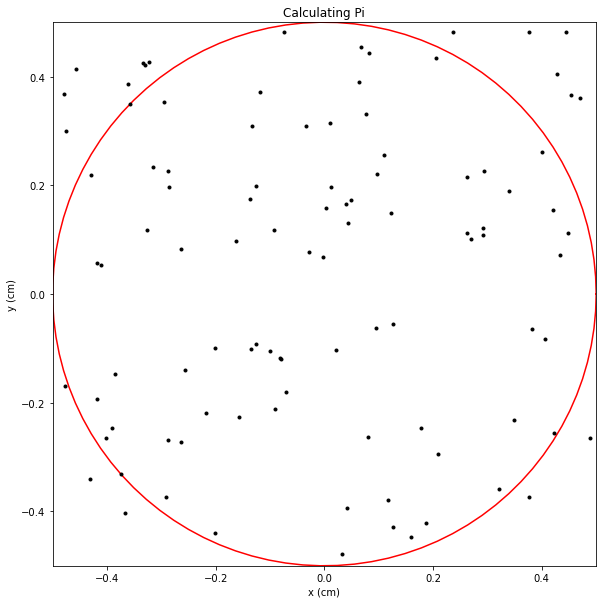

The percentage of darts inside the circle is  82.0 %


In [2]:
Ntotal = 100 #number of darts thrown

L = 1 #the length of the square
R = 0.5

Ninside = 0

xmodel = []
ymodel = []

for i in range(1,Ntotal+1):
    
    x = rand.uniform(-L/2,L/2) #x position of dart
    y = rand.uniform(-L/2,L/2) #y position of dart
    xmodel.append(x) #store
    ymodel.append(y)
    
    ######

    # The distance r of the dart from the center (origin)
    r = np.sqrt(x**2+y**2)
    if r < R:
        Ninside = Ninside + 1
    
    ######
    
#points for the circle
theta = np.linspace(0,2*np.pi,100)
xcircle = R*np.cos(theta)
ycircle = R*np.sin(theta)

#graph
plt.figure(figsize=(10,10))
plt.title("Calculating Pi")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.xlim(-L/2, L/2)
plt.ylim(-L/2, L/2)
plt.plot(xcircle, ycircle, 'r-')
plt.plot(xmodel,ymodel, 'k.')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


###### calculate the percentage of darts inside the circle
percentage = Ninside/Ntotal*100
print("The percentage of darts inside the circle is ", percentage, "%")


(a) **Modify the program above to calculate and print a value for $\pi$ using the equation derived above and the appropriate variables in the program.** You can do this at the end of the program. See where I calculate and print the percentage of darts inside the circle.

(b) How should you change the the program to get the most accurate value of $\pi$ posssible? **Make that change and compare your approximate value (using the Monte Carlo simulation) to the more accurately calculated value of 3.141592653589793.**

# Level B

Ava K. and Rebecca B. are planning a huge fundraising event to raise money to send Alex, Elijah, and the HPU high-power rocketry team to Spaceport America to compete in the collegiate rocket competition. Blake L. and Lexi are developing a business plan for the event and have determined they need to raise 2,000 dollars for Alex and Elijah. McKenna and Lauren suggest a fundraising game using a large human-sized spinner that lays on the ground, similar to the small spinner used in the game *Twister*, but with a board of different size wedges as shown below. With their background in statistics, they suggest making wedges of different sizes, nameed H P U GIVES. A player purchases a spin. If the spin lands in H, P, or U, the player wins money back. If the spin lands in GIVES, all of the player's money becomes a donation. Since giving is ultimately winning, Rachel and Ava T. suggest branding the concept as a "win-win" fundraiser.

![](spinner4.png)

## Exercise 1

First, read the program below and run it to view the results.

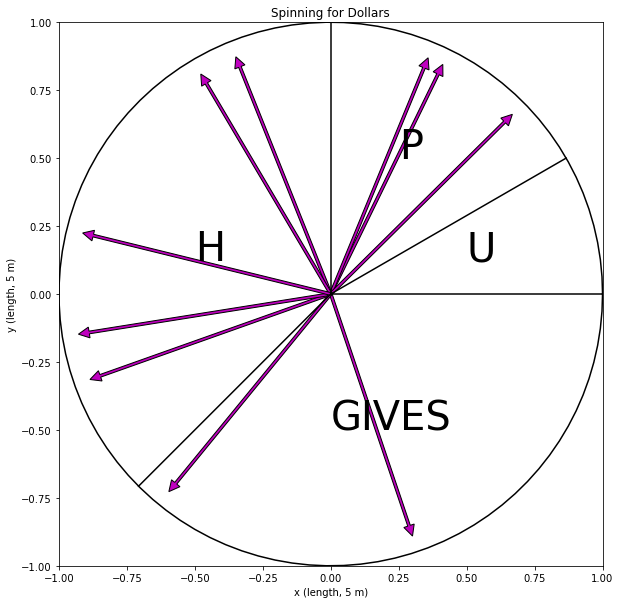

Gross  =  80 dollars
Net profit (gained or lost by fundraiser) =  40 dollars


In [23]:
N = 10 #total number of spins
pspin = 8 #price per spin

pH = 2 #payout for H
pP = 10 #payout for P
pU = 20 #payout for U

net = 0 #net money earned or lost

NP = 0 #number of spins that land in P
NH = 0 #number of spins that land in H
NU = 0 #number of spins that land in U
Ngives = 0 #number of spins that land in GIVES


############

R = 1
phi1 = np.pi/6
phi2 = np.pi/2
phi3 = np.pi + np.pi/4

spins = []

for i in range(N):
    
    theta = rand.uniform(0,2*np.pi) #angle of spinner
    spins.append(theta) #store
    
    if theta < phi1:
        NU = NU + 1
    elif theta < phi2:
        NP = NP + 1
    elif theta < phi3:
        NH = NH + 1
    else:
        Ngives = Ngives + 1
    
#points for the circle
phi = np.linspace(0,2*np.pi,100)
xcircle = R*np.cos(phi)
ycircle = R*np.sin(phi)

#points for boundaries
phi = 0
xline1 = np.cos(phi)*np.linspace(0,R,100)
yline1 = np.sin(phi)*np.linspace(0,R,100)

phi = phi1
xline2 = np.cos(phi)*np.linspace(0,R,100)
yline2 = np.sin(phi)*np.linspace(0,R,100)

phi = phi2
xline3 = np.cos(phi)*np.linspace(0,R,100)
yline3 = np.sin(phi)*np.linspace(0,R,100)

phi = phi3
xline4 = np.cos(phi)*np.linspace(0,R,100)
yline4 = np.sin(phi)*np.linspace(0,R,100)


#graph
plt.figure(figsize=(10,10))
plt.title("Spinning for Dollars")
plt.xlabel("x (length, 5 m)")
plt.ylabel("y (length, 5 m)")
plt.xlim(-R, R)
plt.ylim(-R, R)
plt.plot(xcircle, ycircle, 'k-')
plt.plot(xline1, yline1, 'k-')
plt.plot(xline2, yline2, 'k-')
plt.plot(xline3, yline3, 'k-')
plt.plot(xline4, yline4, 'k-')
plt.text(R/2, R/8, 'U', fontsize = 40)
plt.text(R/4, R/2, 'P', fontsize = 40)
plt.text(-R/2, R/8, 'H', fontsize = 40)
plt.text(0, -R/2, 'GIVES', fontsize = 40)

#draw arrows for spinner
for s in spins:
    plt.arrow(0, 0, 0.9*R*np.cos(s), 0.9*R*np.sin(s), width = 0.01, head_width=0.04, head_length=0.04, fc='m')

plt.gca().set_aspect('equal', adjustable='box')
plt.show()

gross = pspin*N
net = pspin*N - pH*NH - pP*NP - pU*NU

print("Gross  = ", gross, "dollars")
print("Net profit (gained or lost by fundraiser) = ", net, "dollars")

(a) For the initial values given in the program, **how much money does a player pay for a spin?**

(b) For the initial values given in the program, **how much money does a player win for a result of H, P, or U, respectively?**

(c) **What are the names of the variables used (at the end of the program) to calculate the gross money earned (by selling spins) and the net money earned (profit) by the fundraiser (after subtracting the winnings of players)?**

(d) A more useful measurement of net profit is the percentage of gross that is earned, which is

$$\mathrm{percentage\ net\ profit} = \frac{\mathrm{net\ profit}}{\mathrm{gross}}\times 100%$$

A negative number means you lost money.

**At the end of the program, calculate and print the percentage net profit earned on the fundraiser.**

(e) **What is the expected (i.e. most probable) percentage profit on this fundraiser, using the values first defined in the program?** This program can take a long time to display the graphics for large N. I suggest not using more than 10000 spins.

## Exercise 2

Aamiya, using her knowledge of people's behavior in social groups, and Sarah and Lexi, using their experience in accounting and finance, have agreed to sell spins at 8 dollars per spin. **Using the expected percentage profit, how many spins will they have to sell in order to expect to earn the 2,000 dollars Alex and Elijah need for their trip?** (Expectation is based on the probability. You can do a calculation using your answer to Exercise 1. You do not have to run a simulation to answer this question.)

## Exercise 3

**What is the minimum price you must sell a spin in order to not lose money (on average) on the fundraiser?** Copy the program above into the cell below, and modify it as needed.

# Level A

## Exercise 1

Suppose you roll three 6-sided dice. **What is the probability you will get 3 of a kind (i.e. all three dice are the same number)?** Write a program to calculate your answer. For your `if` statement, when you want to use one or more comparisons, you should use the `and` operator. See Level B in the solution for the practice test as an example.

## Exercise 2

In the game of Yahtzee, in one turn, you roll five 6-sided dice up to three times. You can earn points for the following:

- Small Straight (a sequence of 4)
- Large Straight (a sequence of 5)
- 3 of a kind
- 4 of a kind
- YAHTZEE (5 of a kind)
- Full House (3 dice are the same and 2 dice are the same)

I've defined a function `turn()` that accepts an argument that is a string ("3 of a kind" or "4 of a kind", etc.) for what you are looking for and returns 1 if it was rolled during the turn and 0 if it was not rolled during the turn.

There is an array named `dice`. If you `print(dice)` you can see the final roll of the dice, with the dice arranged in ascending order.

Run the cell below to define the `turn()` function and `dice` array.

In [24]:
dice = np.zeros(5) #define an array for the dice

def turn(s):
    # s can be any of the following:
    # "3 of a kind"
    # "4 of a kind"
    # "Full House"
    # "Small Straight"
    # "Large Straight"
    # "YAHTZEE"
    
    result = 0 #default is 0
    global dice

    for i in range(3):
        dice = np.random.randint(1,6, size=5)
        dice.sort()

        if s == "YAHTZEE":
            if dice[0]==dice[1]==dice[2]==dice[3]==dice[4]==dice[5]:
                result = 1
                break

        elif s == "Large Straight":
            u = np.unique(dice)
            if len(u)>=5:
                if u[0]==1 and u[1]==2 and u[2]==3 and u[3]==4 and u[4]==5:
                    result = 1
                    break
                elif u[0]==2 and u[1]==3 and u[2]==4 and u[3]==5 and u[4]==6:
                    result = 1
                    break

        elif s == "Small Straight":
            u = np.unique(dice)
            if len(u)>=4:
                if u[0]==1 and u[1]==2 and u[2]==3 and u[3]==4:
                    result = 1
                    break
                elif u[0]==2 and u[1]==3 and u[2]==4 and u[3]==5:
                    result = 1
                    break
                elif u[0]==3 and u[1]==4 and u[2]==5 and u[3]==6:
                    result = 1
                    break

        elif s == "4 of a kind":
            u, counts = np.unique(dice, return_counts=True)
            if np.any(counts == 4):
                result = 1
                break

        elif s == "3 of a kind":
            u, counts = np.unique(dice, return_counts=True)
            if np.any(counts == 3):
                result = 1
                break

        elif s == "Full House":
            u, counts = np.unique(dice, return_counts=True)
            if np.any(counts == 3) and np.any(counts == 2):
                result = 1
                break
                
    return result


The examples below show you how to call `turn()`, get the result (either 1 or 0), and print the dice. Read and run each example. You can run each example multiple times to make sure each one works. It might also give you a rough idea of how probable (or improbable) certain outcomes are. The less probable, the greater the number of points in the game of YAHTZEE.

In [27]:
result = turn("Small Straight")
print("Final roll is ", dice)
if result == 1:
    print("result = ", result, "Yes, it's a Small Straight!")
if result == 0:
    print("result = ", result, "Not a Small Straight, try again.")

Final roll is  [2 3 3 3 3]
result =  0 Not a Small Straight, try again.


In [28]:
result = turn("Large Straight")
print("Final roll is ", dice)
if result == 1:
    print("result = ", result, "Yes, it's a Large Straight!")
if result == 0:
    print("result = ", result, "Not a Large Straight, try again.")

Final roll is  [1 1 1 3 5]
result =  0 Not a Large Straight, try again.


In [29]:
result = turn("3 of a kind")
print("Final roll is ", dice)
if result == 1:
    print("result = ", result, "Yes, it's 3 of a kind!")
if result == 0:
    print("result = ", result, "Not 3 of a kind, try again.")

Final roll is  [1 3 4 5 5]
result =  0 Not 3 of a kind, try again.


In [30]:
result = turn("4 of a kind")
print("Final roll is ", dice)
if result == 1:
    print("result = ", result, "Yes, it's 4 of a kind!")
if result == 0:
    print("result = ", result, "Not 4 of a kind, try again.")

Final roll is  [3 4 4 4 4]
result =  1 Yes, it's 4 of a kind!


In [31]:
result = turn("YAHTZEE")
print("Final roll is ", dice)
if result == 1:
    print("result = ", result, "Yes, it's YAHTZEE!")
if result == 0:
    print("result = ", result, "Not YAHTZEE, try again.")

Final roll is  [2 2 3 4 5]
result =  0 Not YAHTZEE, try again.


In [32]:
result = turn("Full House")
print("Final roll is ", dice)
if result == 1:
    print("result = ", result, "Yes, it' a Full House!")
if result == 0:
    print("result = ", result, "Not a Full House, try again.")

Final roll is  [1 2 4 5 5]
result =  0 Not a Full House, try again.


Write a program to determine the probability of each outcome:

- "Small Straight"
- "Large Straight"
- "3 of a kind"
- "4 of a kind"
- "YAHTZEE"
- "Full House"

Note that you can write one program for "Small Straight", get the probability, and then change the outcome to "Large Straight" and run the program again.

**After you determine the probability, rank them from most probable to least probable.**